# Klaviyo Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
orders_df = pd.read_csv('screening_exercise_orders_v201810.csv')

In [3]:
orders_df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       13471 non-null  int64  
 1   gender            13471 non-null  int64  
 2   date              13471 non-null  object 
 3   value             13471 non-null  float64
 4   predicted_gender  13471 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


In [5]:
orders_df.describe()

,customer_id,gender,value,predicted_gender
count,13471.000000,13471.000000,13471.000000,13471.000000
mean,5033.693564,0.498256,357.322179,0.642788
std,2500.179222,0.500016,387.210821,0.479196
min,1000.000000,0.000000,0.000000,0.000000
25%,2890.500000,0.000000,161.200000,0.000000
50%,4850.000000,0.000000,258.000000,1.000000
75%,7157.000000,1.000000,426.000000,1.000000
max,9813.000000,1.000000,8046.300000,1.000000


## A)

In [6]:
orders_df['date'] = pd.to_datetime(orders_df['date'])
orders_df['most_recent_date'] = orders_df.groupby(['customer_id']).date.transform('max')
orders_df.head()

,customer_id,gender,date,value,predicted_gender,most_recent_date
0,1000,0,2017-01-01 00:11:31,198.5,1,2017-01-01 00:11:31
1,1001,0,2017-01-01 00:29:56,338.0,1,2017-01-01 00:29:56
2,1002,1,2017-01-01 01:30:31,733.0,1,2017-02-19 21:35:31
3,1003,1,2017-01-01 01:34:22,772.0,1,2017-04-26 02:37:20
4,1004,0,2017-01-01 03:11:54,508.0,1,2017-01-01 03:11:54


In [7]:
orders_df['order_count']= orders_df.groupby(['customer_id']).date.transform('count')
orders_df.head(10)

,customer_id,gender,date,value,predicted_gender,most_recent_date,order_count
0,1000,0,2017-01-01 00:11:31,198.50,1,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,338.00,1,2017-01-01 00:29:56,1
2,1002,1,2017-01-01 01:30:31,733.00,1,2017-02-19 21:35:31,3
3,1003,1,2017-01-01 01:34:22,772.00,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,508.00,1,2017-01-01 03:11:54,1
5,1005,1,2017-01-01 10:08:05,338.00,0,2017-12-16 01:39:27,2
6,1006,1,2017-01-01 15:42:57,1526.43,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,168.00,0,2017-01-01 15:59:50,1
8,1008,0,2017-01-01 18:01:04,207.99,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,283.00,1,2017-01-01 19:27:17,1


In [8]:
orders_df.sort_values(by=['customer_id']).head(10)

,customer_id,gender,date,value,predicted_gender,most_recent_date,order_count
0,1000,0,2017-01-01 00:11:31,198.5,1,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,338.0,1,2017-01-01 00:29:56,1
2,1002,1,2017-01-01 01:30:31,733.0,1,2017-02-19 21:35:31,3
1742,1002,1,2017-02-19 21:35:31,176.0,1,2017-02-19 21:35:31,3
928,1002,1,2017-01-23 04:33:38,148.6,1,2017-02-19 21:35:31,3
3,1003,1,2017-01-01 01:34:22,772.0,1,2017-04-26 02:37:20,4
676,1003,1,2017-01-20 05:56:10,425.5,1,2017-04-26 02:37:20,4
4292,1003,1,2017-04-25 09:54:54,0.0,1,2017-04-26 02:37:20,4
4323,1003,1,2017-04-26 02:37:20,704.0,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,508.0,1,2017-01-01 03:11:54,1


## B)

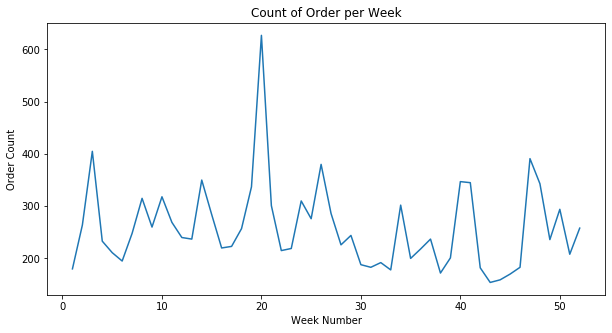

In [9]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(orders_df.groupby(orders_df.date.dt.weekofyear)['value'].count())
_ = plt.title('Count of Order per Week')
_ = plt.xlabel('Week Number')
_ = plt.ylabel('Order Count')

## C)

In [10]:
mean_g0 = orders_df.groupby('gender')['value'].mean()[0]
mean_g1 = orders_df.groupby('gender')['value'].mean()[1]

print('Mean order value for gender 0 is {}'.format(round(mean_g0, 2)))
print('Mean order value for gender 1 is {}'.format(round(mean_g1, 2)))

Mean order value for gender 0 is 363.89
Mean order value for gender 1 is 350.71


In [11]:
N = (orders_df['customer_id'].count())/2
var_g0 = orders_df.groupby('gender')['value'].var(ddof=1)[0]
var_g1 = orders_df.groupby('gender')['value'].var(ddof=1)[1]
s = np.sqrt((var_g0 + var_g1)/2)
t = (mean_g0 - mean_g1)/(s*np.sqrt(2/N))
print('The t-value is {}'.format(round(t,4)))
df = 2*N - 2
p = 1 - stats.t.cdf(t,df=df)
p = 2*p
print('The p-value is {}'.format(round(p,4)))

The t-value is 1.976
The p-value is 0.0482


Yielding a p-value under 0.05 we can reject the initial null hypothesis that there is a statistical significance in the difference between the order values of gender 0 and gender 1.

## D)

In [12]:
y = orders_df['gender']
y_pred = orders_df['predicted_gender']
gender_cm = confusion_matrix(y, y_pred)
gender_cm

array([[3349, 3410],
       [1463, 5249]])

In [13]:
acc = accuracy_score(y, y_pred)
print('Predicted Gender Accuracy Percentage {} %'.format(round(acc * 100, 2)))

Predicted Gender Accuracy Percentage 63.83 %


In [14]:
gender_rep = classification_report(y, y_pred)
print('Predicted Gender Classification Report : \n' ,classification_report(y, y_pred))

Predicted Gender Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

    accuracy                           0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



The confusion matrix above validates that the gender predictions made are not very accurate. With an accuracy of 63.83 percent, roughly every third prediction made orders in the dataset are incorrect. None of the precision, recall, or f-1 scores are not particularly any better either. 

## E)

One of my favourite machine learning tools to use currently is Keras with TensorFlow backend. The flexibility of building custom neural networks using a combination of both Keras and TensorFlow has often given me the freedom to approach problems with the simplicity and modularity of Keras while also having the core strengths of TensorFlow available for greater control. The combination of two was particularly helpful to me while working on my second Capstone Project based on the Stanford Car Dataset. Importing a pre-trained model for image classification, I then began unfreezing layers of the neural network to have more trainable variables yielding a high accuracy and precision in identifying the make, model, body style, and year of vehicles in images. 